In [65]:
import sklearn as sk
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
'''
with open('semeion.data') as file:
    print(list(file.readline().split()))
['0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '0.0000', '1.0000', ...
'''

num = []
ans = []
buf = 0
with open('semeion.data') as file:
    #line = file.readline()
    for line in file:
        buf = list(line.split())
        num.append(np.array(buf[:-10]))
        ans.append(buf[-10:].index('1'))
#print(type(num), len(num), type(ans), len(ans), ans[0])
#print(list(data)[:5])
num = np.array(num)
ans = np.array(ans)
# data = pd.DataFrame(list(zip(num, ans)), columns=['num', 'ans'])
# data.head()
#data.info()

In [172]:
GridSearchCV?

In [167]:
def draw(index):
    print(ans[index])
    fig = plt.figure()
    ax1 = fig.add_subplot(121) 
    ax1.imshow(num[index].reshape(16, 16))
    return

0


TypeError: Image data cannot be converted to float

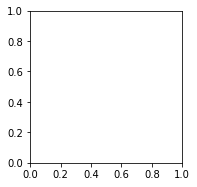

In [168]:
draw(2)

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
X, y = num, ans
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,
random_state=17)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.8723849372384938

In [173]:
KNeighborsClassifier?

In [178]:
knn_params = {'n_neighbors' : [1, 2, 3, 4, 5], \
              "leaf_size": range(10, 101, 20)}
knn_grid = GridSearchCV(knn, knn_params, cv=5)

In [179]:
%%time
knn_grid.fit(X_train, y_train)

Wall time: 3min 46s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5], 'leaf_size': range(10, 101, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [180]:
knn_grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [181]:
knn_grid.best_score_

0.9013452914798207

In [182]:
knn_grid.best_params_

{'leaf_size': 30, 'n_neighbors': 1}

In [183]:
knn_grid_pred = knn_grid.predict(X_holdout)
accuracy_score(y_holdout, knn_grid_pred)

0.899581589958159

In [1]:
print('sosi')

sosi
